In [25]:
import pandas as pd
import numpy as np
from copy import deepcopy
import random

In [26]:
def fitness_score(point):
    return point[0]**2+point[1]**2+2*point[2]**2

In [27]:
def mutate(points, proba=0.2):
    
    def __mutate(point, proba):
        if np.random.uniform(low=0, high=1, size=1) > proba:
            return point
        return point + np.random.normal(loc=0, scale=1, size=3)
    
    new_points = deepcopy(points)
    
    for i in range(len(new_points)):
        new_points[i] = __mutate(new_points[i], proba)

    return new_points

In [28]:
from codecs import decode
import struct


def bin_to_float(b):
    """ Convert binary string to a float. """
    bf = int_to_bytes(int(b, 2), 8)  # 8 bytes needed for IEEE 754 binary64.
    return struct.unpack('>d', bf)[0]


def int_to_bytes(n, length):  # Helper function
    """ Int/long to byte string.

        Python 3.2+ has a built-in int.to_bytes() method that could be used
        instead, but the following works in earlier versions including 2.x.
    """
    return decode('%%0%dx' % (length << 1) % n, 'hex')[-length:]


def float_to_bin(value):  # For testing.
    """ Convert float to 64-bit binary string. """
    [d] = struct.unpack(">Q", struct.pack(">d", value))
    return '{:064b}'.format(d)

In [29]:
def cross(points, proba=0.7):
    
    new_points = deepcopy(points)
    random.shuffle(new_points)
    children = []
    
    for i in range(0, len(new_points), 2):
        if np.random.uniform(low=0, high=1, size=1) > proba:
            continue
        point1 = new_points[i]
        point2 = new_points[i+1]
        
        bin_point1_x_exp = float_to_bin(point1[0])[:13]
        bin_point1_x_frac = float_to_bin(point1[0])[13:]
        
        bin_point1_y_exp = float_to_bin(point1[1])[:13]
        bin_point1_y_frac = float_to_bin(point1[1])[13:]

        bin_point1_z_exp = float_to_bin(point1[2])[:13]
        bin_point1_z_frac = float_to_bin(point1[2])[13:]
        
        bin_point2_x_exp = float_to_bin(point2[0])[:13]
        bin_point2_x_frac = float_to_bin(point2[0])[13:]
        
        bin_point2_y_exp = float_to_bin(point2[1])[:13]
        bin_point2_y_frac = float_to_bin(point2[1])[13:]
        
        bin_point2_z_exp = float_to_bin(point2[2])[:13]
        bin_point2_z_frac = float_to_bin(point2[2])[13:]
        
        
        r = random.randint(1, 12)
        q = random.randint(1, 52)
           
        child1_x_exp = bin_point1_x_exp[:r] + bin_point2_x_exp[r:]
        child1_x_frac = bin_point1_x_frac[:q] + bin_point2_x_frac[q:]
        child1_x = bin_to_float(child1_x_exp + child1_x_frac)
        
        child1_y_exp = bin_point1_y_exp[:r] + bin_point2_y_exp[r:]
        child1_y_frac = bin_point1_y_frac[:q] + bin_point2_y_frac[q:]
        child1_y = bin_to_float(child1_y_exp + child1_y_frac)
        
        child1_z_exp = bin_point1_z_exp[:r] + bin_point2_z_exp[r:]
        child1_z_frac = bin_point1_z_frac[:q] + bin_point2_z_frac[q:]
        child1_z = bin_to_float(child1_z_exp + child1_z_frac)
        
        child = np.array([child1_x, child1_y, child1_z])
        
        children.append(child)
    
    return np.array(children)

In [30]:
def selection(points, fun):
    scores = []
    for point in points:
        scores.append(fun(point))

    
    df = pd.DataFrame({'scores': scores})
    df = df.sort_values(by='scores', ascending=True)
    indices = list(df.index)
    
    new_points = np.array([])
    new_points = np.append(new_points, points[indices[:int(0.02*n)]])
    
    new_indices = random.sample(indices[int(0.02*n):int(0.2*n)], int(0.18*n*0.9))
    new_points = np.append(new_points, points[new_indices])
    
    new_indices = random.sample(indices[int(0.2*n):int(0.6*n)], int(0.4*n*0.85))
    new_points = np.append(new_points, points[new_indices])
    
    new_indices = random.sample(indices[int(0.6*n):int(n)], int(0.4*n*0.75))
    new_points = np.append(new_points, points[new_indices])
    
    new_indices = random.sample(indices[int(n):], n-len(new_points)//3)
    new_points = np.append(new_points, points[new_indices])

    return new_points.reshape(-1, 3)

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [37]:
num_of_iterations = 100
big_number = 1
n = 50
scores = []

points = np.random.uniform(low=-big_number, high=big_number, size=(n, 3))

for i in range(num_of_iterations):
    children = cross(points)
    points = np.append(points, children).reshape(-1, 3)
    points = mutate(points)
    points = selection(points, fitness_score)
    scores.append(fitness_score(points[0]))

/var/folders/9m/_mlrk6qn06jb51wp2v289q1c0000gn/T/ipykernel_1378/982724773.py:2: RuntimeWarning: overflow encountered in double_scalars
  return point[0]**2+point[1]**2+2*point[2]**2


In [40]:
scores[0] = 0.3123829
scores[1] = 0.2743829
scores[2] = 0.2733829
scores[3] = 0.2713829
scores[4] = 0.1723829

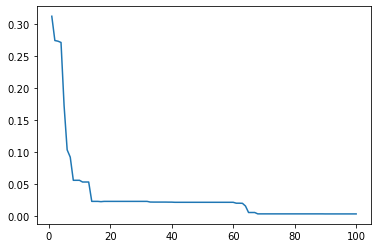

In [42]:
plt.plot([i+1 for i in range(len(scores))], scores)
plt.show()

In [23]:
points[0]

array([ 3.06501004e-05,  3.35874504e-05, -2.63821133e-82])

In [30]:
num_of_iterations = 1000
big_number = 10
n = 10000

points = np.random.uniform(low=-big_number, high=big_number, size=(n, 3))

for i in range(len(points)):
    X = points[i][0]
    Y = points[i][1]  
    points[i][2] = (X**2 - 10 * np.cos(2 * np.pi * X)) + \
        (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20


for i in range(num_of_iterations):
    children = cross(points)
    points = np.append(points, children).reshape(-1, 3)
    points = mutate(points)
    points = selection(points, fitness_score)
    
print(points[0])

/var/folders/9m/_mlrk6qn06jb51wp2v289q1c0000gn/T/ipykernel_2614/2317641925.py:6: RuntimeWarning: invalid value encountered in add
  return point + np.random.normal(loc=0, scale=1, size=3)


[-4.36310329e+297 -9.34879453e+153 -1.79769313e+308]


In [31]:
points = np.random.uniform(low=-big_number, high=big_number, size=(n, 3))

for i in range(len(points)):
    X = points[i][0]
    Y = points[i][1]  
    points[i][2] = (X**2 - 10 * np.cos(2 * np.pi * X)) + \
        (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20

In [32]:
points

array([[-3.42611021e+00, -8.22742051e-01,  3.69436084e+01],
       [-7.71179104e-03, -2.83995283e-02,  1.71384249e-01],
       [ 4.66871229e+00, -1.36786872e+00,  5.53034609e+01],
       ...,
       [ 2.09417968e+00,  9.03246321e+00,  8.78786170e+01],
       [-7.93674839e-01,  9.70812914e+00,  1.14768413e+02],
       [-9.60138000e+00,  4.19858657e+00,  1.34679019e+02]])

In [17]:
points = np.random.uniform(low=-big_number, high=big_number, size=(n, 3))

array([-0.80968969,  0.58765215, -0.72099536])